### IDs:
Insert yours IDs to the cell below

ID #1: 204079453

ID #2: 205714447


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
from scipy.optimize import fsolve


### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [64]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [65]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target

In [66]:
print(df.shape)
display(df.head())

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [67]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


1. describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?

In [69]:
print(f"The boston datset has {df.shape[0]} samples, with {df.shape[1]} features (including the target feature) \nand all the variable are float type")


The boston datset has 506 samples, with 14 features (including the target feature) 
and all the variable are float type


2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.


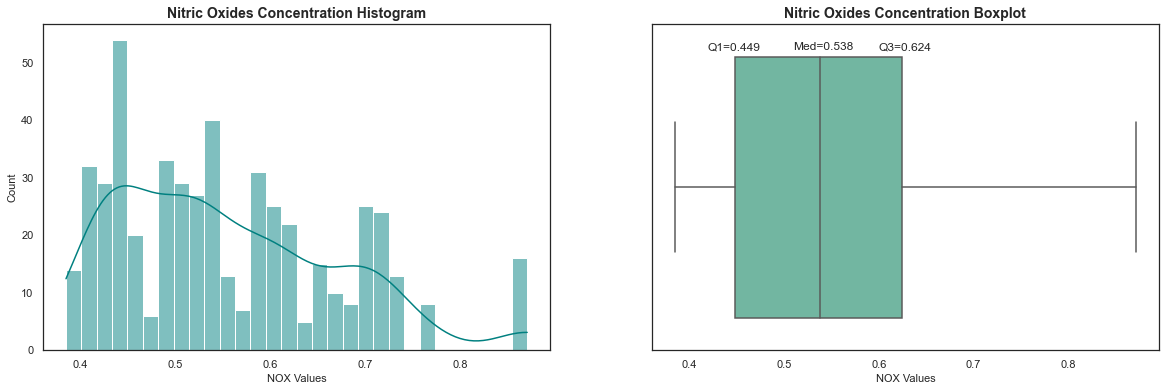

In [70]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.histplot(df['NOX'],ax = ax[0],color = "teal",ec="white",bins=30,kde=True)
ax[0].set_title('Nitric Oxides Concentration Histogram', fontsize = 14, fontweight='bold')
ax[0].set_xlabel("NOX Values",fontsize = 11)
ax[0].set_ylabel("Count",fontsize = 11)
sns.boxplot(x=df['NOX'],ax = ax[1], palette="Set2")
ax[1].set_title('Nitric Oxides Concentration Boxplot', fontsize = 14, fontweight='bold')
ax[1].set_xlabel("NOX Values",fontsize = 11)
ax[1].text(x=0.51,y=-0.42,s="Med="+str(df['NOX'].median()))
ax[1].text(x=0.42,y=-0.42,s="Q1="+str(df['NOX'].quantile(0.25)))
ax[1].text(x=0.6,y=-0.42,s="Q3="+str(df['NOX'].quantile(0.75)))
plt.show()

In [9]:
## Read again.

From the analysis of both plots we can infer the following: 
<ul>
    <li>50% of the values are in between 0.45 to 0.62</li>
    <li>From the wide spread in the histogram/kde, high variance can be seen (there is no peak)</li>
    <li>It contains right tail</li>
</ul>

3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?


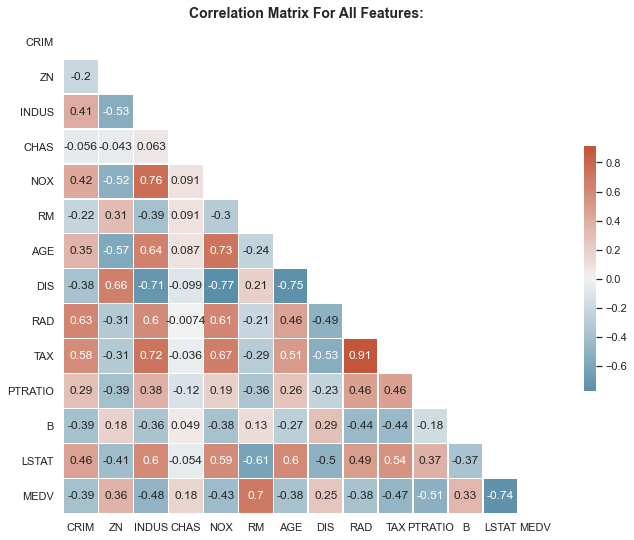

In [71]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True,mask=mask,cmap=cmap,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation Matrix For All Features: ",fontsize = 14, fontweight='bold')
plt.show()

<!--    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's -->

**We assume that correlated features considered from ± 0.6 therfore in our data there are correlated features, as following:*

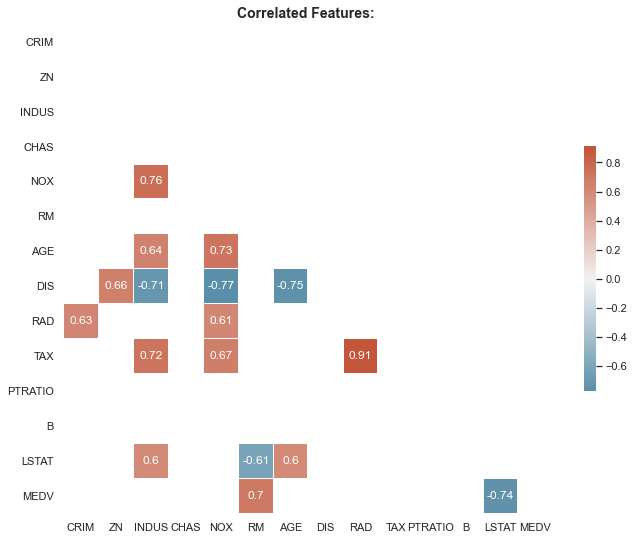

In [72]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr[(corr>0.6)|(corr<-0.6)], annot=True,mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlated Features: ",fontsize = 14, fontweight='bold')
plt.show()

From all features, RAD and TAX have the highest correlation.

From the data exploration process we noticed that the CHAS feature is a binary. 
<br>It can be seen that it has a low(~0) correlation with all the other features, since it is a binary variable unlike the other features which are continuous.

In [75]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 

In [76]:
temp = corr[corr<1]

In [77]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(corr_matrix, n=5):
    au_corr = corr_matrix.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [87]:
get_redundant_pairs(temp)
top_corr = get_top_abs_correlations(temp,n=2).reset_index().rename(columns={'level_0':'col1','level_1':'col2','0':''})

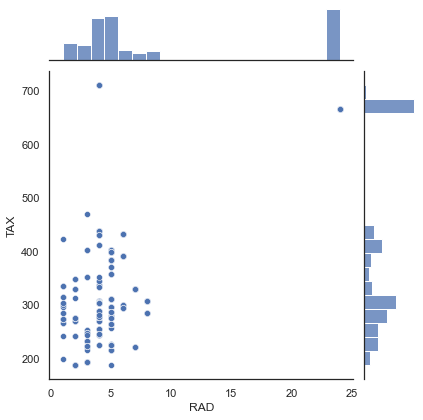

In [102]:
sns.jointplot(x=top_corr['col1'][0], y=top_corr['col2'][0], data=df,marginal_kws=dict(bins=20))
#plt.title(f"Correlation between {top_corr['col1'][0]} and {top_corr['col2'][0]}",fontsize = 14, fontweight='bold')
plt.show()

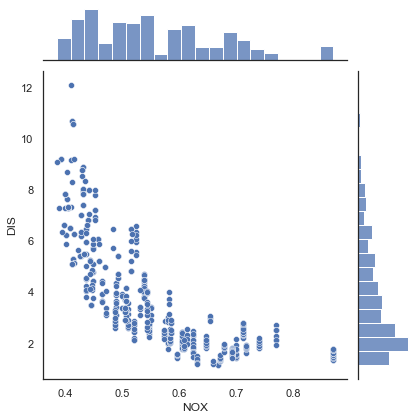

In [104]:
sns.jointplot(x=top_corr['col1'][1], y=top_corr['col2'][1], data=df, marginal_kws=dict(bins=20))
#plt.title(f"Correlation between {top_corr['col1'][1]} and {top_corr['col2'][1]}",fontsize = 14, fontweight='bold')
plt.show()

5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)


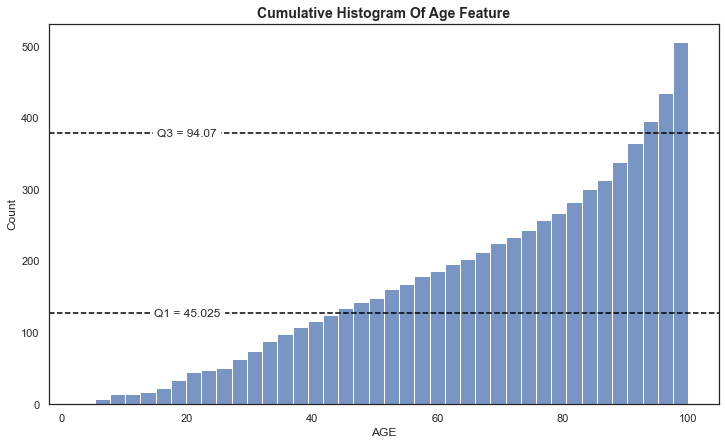

In [105]:
fig, ax = plt.subplots(figsize=(12,7))
sns.histplot(x='AGE',data=df,cumulative=True,bins=40)

q1 = df['AGE'].quantile(0.25)
q3 = df['AGE'].quantile(0.75)

count_q1 = df[df['AGE']<=q1]['AGE'].count()
count_q3 = df[df['AGE']<=q3]['AGE'].count()

ax = plt.gca()

ax.axhline(count_q1, c='black',linestyle='--')
plt.text(20,count_q1, 'Q1 = '+str(q1), fontsize=12, va='center', ha='center',backgroundcolor='w')

ax.axhline(count_q3, c='black',linestyle='--')
plt.text(20,count_q3, 'Q3 = '+str(round(q3,2)), fontsize=12, va='center', ha='center',backgroundcolor='w')
ax.set_title("Cumulative Histogram Of Age Feature",fontsize = 14, fontweight='bold')
plt.show()

6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

From the correlation matrix we observed the two highest correlated pairs:
    <li><b><u>TAX and INDUS with a positive correlation:</u></b> This correlation argues that the more retial buisnesses per acers the higher the tax payment</li>
    <li><b><u>NOX and DIS with a negative correlation:</u></b> This correlation argues that as long as a preson lives further from the center the air pollution decreases </li>
    

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

#### Answer: 

The number of parameters define the joint distribution is: $(n\times m\times k) -1 \rightarrow (n\times m\times 2) -1 $
<br>The last parameter can be calculated based on the second axiom of probability(P($\Omega$) = 1)

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

#### Answer: 

The number of parameters define the joint distribution is: $(n-1) + (m-1) + (k-1) \rightarrow n + m -3  $

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

#### Answer: 

The number of parameters define the joint distribution is: $k\times ((n-1) + (m-1)) -1\rightarrow 2\times ((n-1) + (m-1)) -1= 2n+2m-5  $

#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

#### Answer: 
We will present an example for a case where the above equation does not hold.
<br>$P((X = x \cap Y = y)|Z = z) \ne P((X = x)|Z = z)P((Y = y)|(Z = z))$ 
<br>We will define Z as BMI, X -hieght, Y-weight, therfore $Z=\frac{Y}{X^2}$   
<br>Let X be standrad random normal variable with the value 1 
<br>Let Y be standrad random normal variable with the value 2 
<br>$P((X = 1 \cap Y = 2)|Z = 4) \ne P((X = 1)|Z = 4)P((Y = 2)|(Z = 4))$ 
<br>$P((X = 1 \cap Y = 2)|Z = 4) = 0$
<br>$P((X = 1)|Z = 4)P((Y = 2)|(Z = 4)) > 0$ 

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [106]:
df_gmd = pd.read_csv("GMD_2021.csv", header=None)

In [107]:
df_gmd.shape

(800, 2)

In [108]:
df_gmd = df_gmd.rename(columns={0:'x',1:'value'})

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

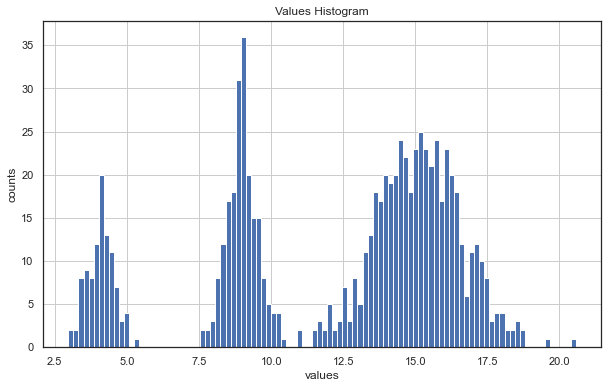

In [109]:
fig, ax = plt.subplots(figsize=(10,6))
df_gmd['value'].hist(bins=100)
plt.xlabel('values')
plt.ylabel('counts')
plt.title('Values Histogram')
plt.show()

First way:

In [119]:
mu = [4,9,14] 
sigma = [0.5,0.5,1.5]
w = [0.3,0.25,0.45]

In [125]:
def calculate_responsinilities (df: pd.DataFrame, means:list, sigma:list, w:list):
    
    prob_1 = w[0]*stats.norm.pdf(df['value'] , loc=mu[0], scale=sigma[0])
    prob_2 = w[1]*stats.norm.pdf(df['value'] , loc=mu[1], scale=sigma[1])
    prob_3 = w[2]*stats.norm.pdf(df['value'] , loc=mu[2], scale=sigma[2])
    
    sum_of_probs = prob_1 + prob_2 + prob_3
    
    res_1 = prob_1/sum_of_probs
    res_2 = prob_2/sum_of_probs
    res_3 = prob_3/sum_of_probs
    
    return res_1,res_2,res_3 

def calcaulte_new_parmaters (res_1:list,res_2:list,res_3:list,w:list,df:pd.DataFrame):
    
    number_of_values = df.shape[0]
    
    new_w1 = sum(res_1)/number_of_values
    new_w3 = sum(res_3)/number_of_values
    
    # Calculate the factor in order to keep w1+w3 equal to 0.75 
    factor = (w[0]+w[2])/(new_w1+new_w3)
    
    # Calculate the normalized w's:
    new_w1 = factor*new_w1
    new_w3 = factor*new_w3
    
    # Calculate the mu:
    mu_3 = (res_3*df['value']).sum()/(new_w3*number_of_values)
    
    return new_w1, new_w3, mu_3  

In [137]:
delta = 0.05
i = 1
results = w[0],w[2],mu[2]

while i>delta:
    
    res_1,res_2,res_3 = calculate_responsinilities(df_gmd, mu, sigma, w)
    new_w1, new_w3, mu_3 = calcaulte_new_parmaters (res_1,res_2,res_3 ,w, df_gmd)
    i = max([abs(results[0]-new_w1),abs(results[1]-new_w3),abs(results[2]-mu_3)])
    results = new_w1, new_w3, mu_3



print(f"The Estimated Paramteres:\nw_1: {results[0]}\nw_3: {results[1]}\nmu_3: {results[2]}\n ")

The Estimated Paramteres:
w_1: 0.12426713823004437
w_3: 0.6257328617699556
mu_3: 15.15587141013679
 


Second way:

We already proved in class the equations of expectation and variance of GMM.<br>
From the parameters given above, we have 3 missing variables - $w1, w3, \mu3$.<br>
So, we need to solve 3 equations with 3 missing variables.<br>
The equations are:<br>
    1. $w1 = 0.75-w3$   - total of all 3 weights is 1<br>
    2. $E(x)=\sum_{i=1}^{i=3}w_iE(x_i)$   - expectation of the 3 gaussians<br>
    3. $V(x)=\sum_{i=1}^{i=3}w_iE((X_i-\mu_i)^2)+\sum_{i=1}^{i=3}w_iE(\mu_i-\mu)^2$   - variance of the 3 gaussians<br>

Since we have 3 missing parameters: $\mu_3, w_1 and w_3$
<br>We will solve this using equations presented in class (3 missing parameters $\rightarrow$ needed 3 equations):
<br><ol>
<li>$w_1 + w_2 + w_3 = 1$</li>
<li>$E(x)=\sum_{i=1}^{i=3}w_iE(x_i)$</li>
<li>$V(x)=\sum_{i=1}^{i=3}w_iE((X_i-\mu_i)^2)+\sum_{i=1}^{i=3}w_iE(\mu_i-\mu)^2$</li>
    </ol>

In [141]:
mu = np.mean(df_gmd['value'])
var = np.var(df_gmd['value'])

def equations(x0):
    
    #x0[0] - w1, x0[1] - w3, x0[2] - mu3
    result = np.zeros(np.size(x0))
    result[0] = x0[0] + x0[1] - 0.75
    result[1] = x0[0]*4 + 0.25*9 + x0[1]*x0[2] - mu
    result[2] = (x0[0]*(0.5**2) + 
                0.25*(0.5**2) + 
                x0[1]*(1.5**2) +
                x0[0]*((4-mu)**2) + 
                0.25*((9-mu)**2) + 
                x0[1]*((x0[2]-mu)**2))-var
    return result

x0 = np.array([1.0,1.0,1.0])
results1 = fsolve(equations,x0)
print(f"The Estimated Paramteres:\nw_1: {results1[0]}\nw_3: {results1[1]}\nmu_3: {results1[2]}\n ")

The Estimated Paramteres:
w_1: 0.12320049208831452
w_3: 0.6267995079116855
mu_3: 15.086229319571718
 


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

In [142]:
mu_3b = [4, 9, mu_3]
sigma_3b = [0.5, 0.5, 1.5]
w_3b = [new_w1, 0.25, new_w3]

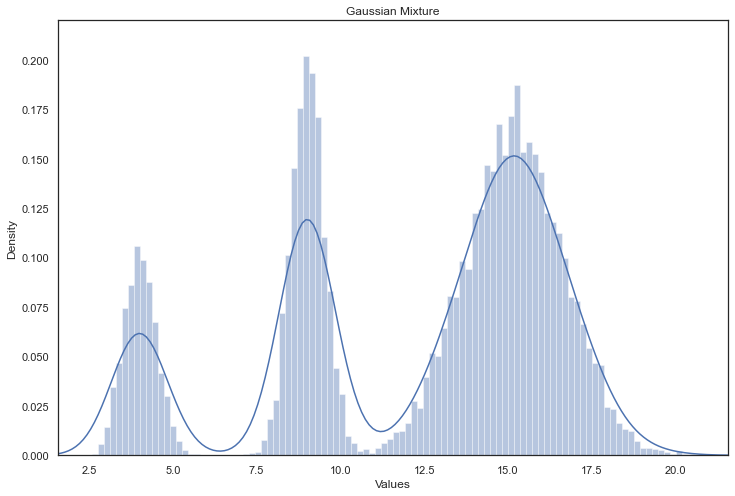

In [143]:
# distplot - This function is deprecated and will be removed in a future version. 
import warnings
warnings.filterwarnings('ignore')

random.seed(250694)
gaussian_mixture=[]

for i in range(10000):
    x = stats.uniform.rvs(loc=0, scale=1, size=1)
    
    if (x<w_3b[0]):
        gaussian_mixture.append(np.random.normal(loc=mu_3b[0], scale=sigma_3b[0] ,size=1))
        
    elif (w_3b[0] <= x < (w_3b[0]+w_3b[1])):
        gaussian_mixture.append(np.random.normal(loc=mu_3b[1], scale=sigma_3b[1] ,size=1))
        
    else:
        gaussian_mixture.append(np.random.normal(loc=mu_3b[2], scale=sigma_3b[2] ,size=1))

fig,ax = plt.subplots(figsize=(12,8))

# We chose to plot the grpah between the minimal and the maximal value of the random data, 
# In order to illustrate a clear image that will be proportional in relation to data
plt.xlim(min(gaussian_mixture)-1,max(gaussian_mixture)+1)
plt.ylim(0,0.22)

sns.distplot(gaussian_mixture,bins=100)
ax.set_xlabel('Values')
ax.set_title("Gaussian Mixture")

plt.show()

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

We will try to solve this using the <b>EM method</b> .
<br><b>It can not be solved using the equations</b> (presented in the second option) because there are 6 variables with 3 equations 

In [123]:
mu_3c = [4, 9, 15, 11]
sigma_3c = [0.5, 0.5, 1.5, 0.5]
w_3c = [0.1, 0.25, 0.35, 0.3]

In [145]:
# Adjstment in order to calculate the new parameters for the 4th Gaussian distributin
def calculate_responsinilities (df: pd.DataFrame, means:list, sigma:list, w:list):
    
    prob_1 = w[0]*stats.norm.pdf(df['value'] , loc=means[0], scale=sigma[0])
    prob_2 = w[1]*stats.norm.pdf(df['value'] , loc=means[1], scale=sigma[1])
    prob_3 = w[2]*stats.norm.pdf(df['value'] , loc=means[2], scale=sigma[2])
    prob_4 = w[3]*stats.norm.pdf(df['value'] , loc=means[3], scale=sigma[3])
    
    sum_of_probs = prob_1 + prob_2 + prob_3 +prob_4
    
    res_1 = prob_1/sum_of_probs
    res_2 = prob_2/sum_of_probs
    res_3 = prob_3/sum_of_probs
    res_4 = prob_4/sum_of_probs
    
    return res_1,res_2,res_3, res_4 

def calcaulte_new_parmaters (res_1:list,res_2:list,res_3:list,res_4:list,w:list,df:pd.DataFrame):
    
    number_of_values = df.shape[0]
    
    new_w1 = sum(res_1)/number_of_values
    new_w3 = sum(res_3)/number_of_values
    new_w4 = sum(res_4)/number_of_values
    

    # Calculate the factor in order to keep w1+w3+w4 equal to 0.75 
    factor = (w[0]+w[2]+w[3])/(new_w1+new_w3+new_w4)

    
    # Calculate the normalized w's:
    new_w1 = factor*new_w1
    new_w3 = factor*new_w3
    new_w4 = factor*new_w4
    
    # Calculate the mu:
    mu_3 = (res_3*df['value']).sum()/(new_w3*number_of_values)
    mu_4 = (res_4*df['value']).sum()/(new_w4*number_of_values)
    
    #Calculate the sigma:
    sigma_4 = ((res_4*(df['value']-mu_4)**2).sum())/(new_w4*number_of_values)
    
    return new_w1, new_w3, new_w4, mu_3, mu_4, sigma_4

In [149]:
delta = 0.05
i = 1
results_3c=[]
results_3c = [w_3c[0],w_3c[2],w_3c[3],mu_3c[2],mu_3c[3],sigma_3c[3]]

while i>delta:
    
    res_1,res_2,res_3, res_4 = calculate_responsinilities(df_gmd, mu_3c, sigma_3c, w_3c)
    new_w1, new_w3, new_w4, mu_3, mu_4, sigma_4 = calcaulte_new_parmaters (res_1,res_2,res_3,res_4 ,w_3c, df_gmd)
    i = max([abs(results_3c[0]-new_w1),
             abs(results_3c[1]-new_w3),
             abs(results_3c[2]-new_w4),
             abs(results_3c[3]-mu_3),
             abs(results_3c[4]-mu_4),
             abs(results_3c[5]-sigma_4)])
    results_3c = [new_w1, new_w3, new_w4, mu_3, mu_4, sigma_4]

    
print("The Estimated Parameters:",
    "\nw1:",round(results_3c[0],2), 
    "\nw3:",round(results_3c[1],2), 
    "\nw4:",round(results_3c[2],2), 
    "\nmu3:",round(results_3c[3],2), 
    "\nmu4:",round(results_3c[4],2), 
    "\nsigma4:",round(results_3c[5],2))


The Estimated Parameters: 
w1: 0.12 
w3: 0.6 
w4: 0.03 
mu3: 15.47 
mu4: 11.22 
sigma4: 0.85


In [150]:
mu_3c = [4, 9, mu_3, mu_4]
sigma_3c = [0.5, 0.5, 1.5, sigma_4]
w_3c = [new_w1, 0.25, new_w3, new_w4]

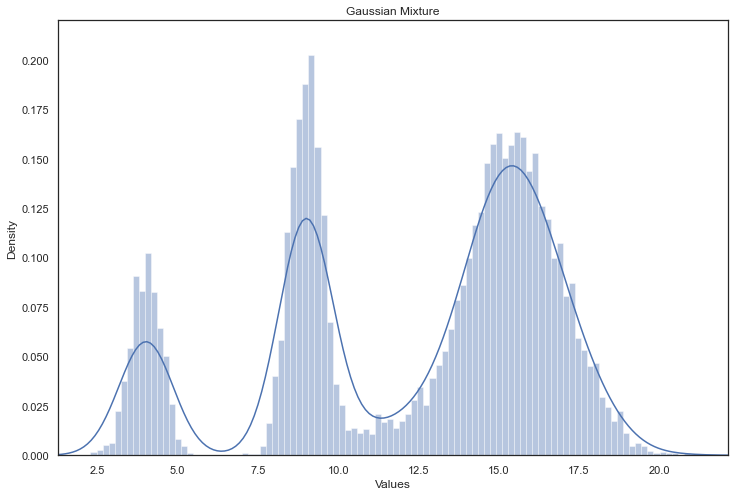

In [155]:
# distplot - This function is deprecated and will be removed in a future version. 
import warnings
warnings.filterwarnings('ignore')

random.seed(250694)
gaussian_mixture=[]

for i in range(10000):
    x = stats.uniform.rvs(loc=0, scale=1, size=1)
    
    if (x<w_3c[0]):
        gaussian_mixture.append(np.random.normal(loc=mu_3c[0], scale=sigma_3c[0] ,size=1))
        
    elif (w_3c[0] <= x < (w_3c[0]+w_3c[1])):
        gaussian_mixture.append(np.random.normal(loc=mu_3c[1], scale=sigma_3c[1] ,size=1))
        
    elif (w_3c[1] <= x < (w_3c[0]+w_3c[1]+w_3c[2])):
        gaussian_mixture.append(np.random.normal(loc=mu_3c[2], scale=sigma_3c[2] ,size=1))
        
    else:
        gaussian_mixture.append(np.random.normal(loc=mu_3c[3], scale=sigma_3c[3] ,size=1))

fig,ax = plt.subplots(figsize=(12,8))

# We chose to plot the grpah between the minimal and the maximal value of the random data, 
# In order to illustrate a clear image that will be proportional in relation to data
plt.xlim(min(gaussian_mixture)-1,max(gaussian_mixture)+1)
plt.ylim(0,0.22)

sns.distplot(gaussian_mixture,bins=100)
ax.set_xlabel('Values')
ax.set_title("Gaussian Mixture")
plt.show()

<b>Conclusions:</b>
<br>Even though another gaussian distribution was added, from the graphs it seems that it didn't contribute much to the mixture.
 

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

<b><u>We can generae data in the following ways:</u></b>
<ol>
    <li><u>concatenated Sampling</u>:
        <ul>
            <li>Create 3 Gaussians distribution based on the given parameters.</li>
            <li>The sample size of each gaussian will be determine by its weight multiplied by the total samples of the Gaussians mixture</li>
            <li>Concat the reaults of all the gaussians</li>
        </ul>
    </li>
    <li><u>Iterated Sampling</u>:
        <ul>
            <li>Create a for loop in the length of the data.  
                </li>
            <li>In each iteration, according to a condition that determined using the weights, it generate a normal distributed number from the relevant Gaussian with the given parameters and append it to a list. 
                </li>
            </ul>
        </li>
        
</ol>

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


In [152]:
mu_3e = [3, 7, 10]
sigma_3e = [1, 1, 1]
w_3e = [0.33, 0.33, 0.33]

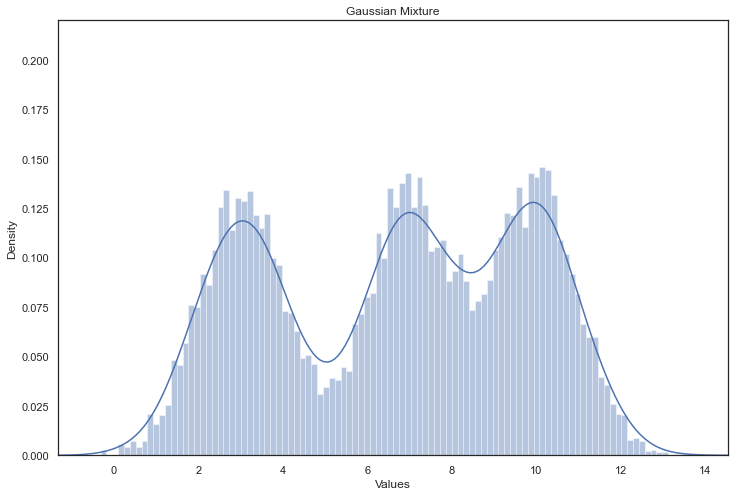

In [156]:
# distplot - This function is deprecated and will be removed in a future version. 
import warnings
warnings.filterwarnings('ignore')

random.seed(250694)
gaussian_mixture=[]

for i in range(10000):
    x = stats.uniform.rvs(loc=0, scale=1, size=1)
    
    if (x<w_3e[0]):
        gaussian_mixture.append(np.random.normal(loc=mu_3e[0], scale=sigma_3e[0] ,size=1))
        
    elif (w_3e[0] <= x < (w_3e[0]+w_3e[1])):
        gaussian_mixture.append(np.random.normal(loc=mu_3e[1], scale=sigma_3e[1] ,size=1))
        
    else:
        gaussian_mixture.append(np.random.normal(loc=mu_3e[2], scale=sigma_3e[2] ,size=1))

fig,ax = plt.subplots(figsize=(12,8))

# We chose to plot the grpah between the minimal and the maximal value of the random data, 
# In order to illustrate a clear image that will be proportional in relation to data
plt.xlim(min(gaussian_mixture)-1,max(gaussian_mixture)+1)
plt.ylim(0,0.22)

sns.distplot(gaussian_mixture,bins=100)
ax.set_xlabel('Values')
ax.set_title("Gaussian Mixture")
plt.show()

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

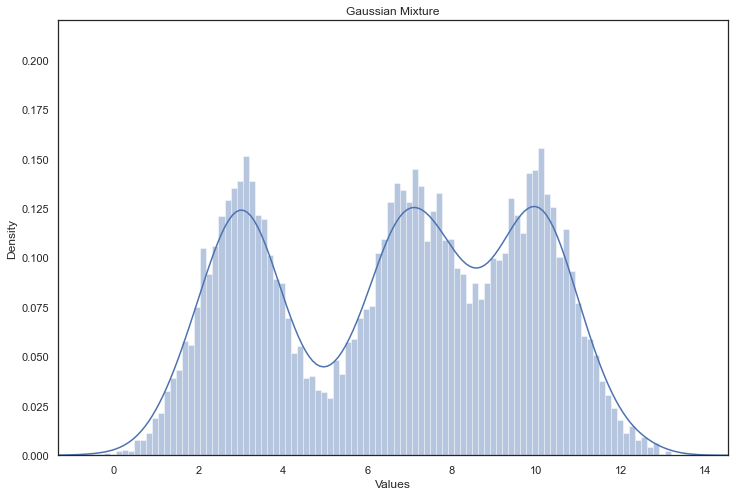

In [157]:
N=10000
first_gaussian = stats.norm.rvs(loc=mu_3e[0],scale=sigma_3e[0],size=int(N*w_3e[0]))
second_gaussian = stats.norm.rvs(loc=mu_3e[1],scale=sigma_3e[1],size=int(N*w_3e[1]))
third_gaussian = stats.norm.rvs(loc=mu_3e[2],scale=sigma_3e[2],size=int(N*w_3e[2]))

concated_arrays = np.concatenate([first_gaussian,second_gaussian,third_gaussian])

fig,ax = plt.subplots(figsize=(12,8))

# We chose to plot the grpah between the minimal and the maximal value of the random data, 
# In order to illustrate a clear image that will be proportional in relation to data
plt.xlim(min(gaussian_mixture)-1,max(gaussian_mixture)+1)
plt.ylim(0,0.22)

sns.distplot(concated_arrays, bins=100)
ax.set_xlabel('Values')
ax.set_title("Gaussian Mixture")
plt.show()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

In [158]:
mu = 70000
sigma = 30000
x = 50000
p_x_less_than_50 = stats.norm.cdf(x, loc=mu, scale=sigma)
p_x_less_than_50 = round(p_x_less_than_50*100, 2)

In [159]:
print(f"{p_x_less_than_50}% of people earn less than 50,000 RCU")

25.25% of people earn less than 50,000 RCU


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [160]:
p_x_between_45_and_65 = stats.norm.cdf(65000, loc=mu, scale=sigma) - stats.norm.cdf(45000, loc=mu, scale=sigma)
p_x_between_45_and_65 = round(p_x_between_45_and_65*100, 2)

In [161]:
print(f"{p_x_between_45_and_65}% of people earn between 45,000 RCU and 65,000 RCU")

23.15% of people earn between 45,000 RCU and 65,000 RCU


#### 4.C
What percent of people earn more than 70,000 RCU?

In [162]:
p_x_more_than_70 = 1 - stats.norm.cdf(70000, loc=mu, scale=sigma)
p_x_more_than_70 = round(p_x_more_than_70*100, 2)

In [163]:
print(f"{p_x_more_than_70}% of people earn more than 70,000 RCU")

50.0% of people earn more than 70,000 RCU


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [164]:
N=1000
p_x_more_than_140 = 1-(stats.norm.cdf(140000, loc=mu, scale=sigma))
employees_more_than_140= round(p_x_more_than_140*N,0)

In [166]:
print(f"{int(employees_more_than_140)} people expected to earn more than 140,000 RCU")

10 people expected to earn more than 140,000 RCU


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [208]:
def tn_expectation(N):
    
    expected_value = 0
    for i in range(1,N+1):
        expected_value += (N/(N-i+1))
        
    return expected_value

In [209]:
tn_expectation(100)

518.737751763962

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [210]:
def tn_variance(N):
    
    var = 0
    for i in range(1,N+1):
        var += (N**2)*(1/(i**2))-(N*(1/i))
        
    return var

In [211]:
tn_variance(100)

15831.101250084974

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [228]:
# Need to re-write.. 
def survival_prob_calc(unique_coupon: int, min_trials: int):
    
    p_vec = (unique_coupon - np.arange(unique_coupon)) / unique_coupon
    
    trials_vec = np.arange(1, min_trials+1)
    
    p1 = stats.geom.pmf(trials_vec, p_vec[0])

    for succ_prob in p_vec[1:]:
        p_i = stats.geom.pmf(trials_vec, succ_prob)
        p1 = np.convolve(p1, p_i)
        
    return 1 - p1[:min_trials - unique_coupon +1].sum() # sums only the relevant location of the convolution.

In [234]:
survival_prob_calc(30,60)

0.9940158432042814

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

In [235]:
def chebi_bound(N,K):
    
    b = (K-tn_expectation(N))/(tn_variance(N)**0.5)
    return 1-(1/(b**2))

    

In [236]:
print(f"The lower bound we recieved from Chebicheff is: {chebi_bound(30,60)}")

The lower bound we recieved from Chebicheff is: 0.6283935500524924
